In [1]:

import numpy as np
import os


import cv2 as cv
import matplotlib.pyplot as plt
# loading the image
img1 = cv.imread('E:\Download\OCVM\ImagesQuery\Flammable Liquid.png',cv.IMREAD_GRAYSCALE)# queryImage
img2 = cv.imread('E:\Download\OCVM\ImageTest2\IMG_20220511_142639.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)


error: ignored

In [ ]:
# fetching the dimensions
wid = img1.shape[1]
hgt = img1.shape[0]
  
# displaying the dimensions
print(str(wid) + "x" + str(hgt))

234x229


In [ ]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

#(kp1[m.queryIdx].pt, kp2[m.trainIdx].pt)

#def location():



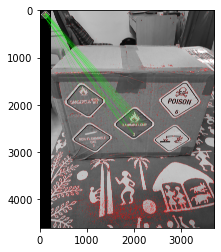

(<matplotlib.image.AxesImage at 0x19880169d88>, None)

In [ ]:
plt.imshow(img3),plt.show()

In [ ]:
print(len(kp2))
print(len(des2))
print(len(matches))
print(len(matchesMask))

28225
28225
125
125


In [ ]:
plist = []
plist2 = []

In [ ]:

for i,(m,n) in enumerate(matches):
    if matchesMask[i][0] and m.distance < 0.75*n.distance:
        qpt = int(kp1[m.queryIdx].pt[0]), int(kp1[m.queryIdx].pt[1])
        tpt = int(kp2[m.trainIdx].pt[0]), int(kp2[m.trainIdx].pt[1])
        plist.append((qpt,tpt,m.distance))

print(plist)
len(plist)

[((62, 104), (1497, 2449), 96.43132019042969), ((62, 94), (1497, 2410), 185.0594482421875), ((62, 100), (1499, 2434), 175.97158813476562), ((65, 103), (1513, 2444), 127.15737915039062), ((65, 97), (1512, 2419), 133.55897521972656), ((69, 105), (1530, 2449), 83.74962615966797), ((72, 102), (1544, 2439), 129.62252807617188), ((72, 102), (1544, 2439), 125.76565551757812), ((98, 84), (1671, 2370), 118.10165405273438), ((98, 84), (1671, 2370), 119.98750305175781), ((100, 67), (1686, 2300), 166.97604370117188), ((100, 67), (1686, 2300), 176.48512268066406), ((102, 95), (1692, 2412), 146.29080200195312), ((102, 95), (1692, 2412), 180.52146911621094), ((102, 90), (1695, 2391), 152.2136688232422), ((104, 51), (1708, 2233), 137.12767028808594), ((105, 52), (630, 1681), 227.54339599609375), ((105, 81), (1714, 2359), 225.02667236328125), ((107, 79), (1724, 2351), 162.4499969482422), ((109, 90), (1721, 2390), 216.8916778564453), ((109, 100), (1732, 2431), 146.8740997314453), ((112, 160), (1733, 265

53

In [ ]:
sorted(plist, key=lambda plist: plist[2])

[((69, 105), (1530, 2449), 83.74962615966797),
 ((130, 84), (1835, 2367), 85.98255920410156),
 ((149, 92), (1923, 2396), 93.30594635009766),
 ((62, 104), (1497, 2449), 96.43132019042969),
 ((130, 84), (1835, 2367), 101.9754867553711),
 ((150, 95), (1925, 2411), 104.0672836303711),
 ((98, 84), (1671, 2370), 118.10165405273438),
 ((114, 73), (1755, 2325), 119.89579010009766),
 ((98, 84), (1671, 2370), 119.98750305175781),
 ((72, 102), (1544, 2439), 125.76565551757812),
 ((65, 103), (1513, 2444), 127.15737915039062),
 ((72, 102), (1544, 2439), 129.62252807617188),
 ((65, 97), (1512, 2419), 133.55897521972656),
 ((104, 51), (1708, 2233), 137.12767028808594),
 ((102, 95), (1692, 2412), 146.29080200195312),
 ((109, 100), (1732, 2431), 146.8740997314453),
 ((125, 94), (1805, 2406), 147.22772216796875),
 ((134, 94), (1848, 2406), 151.93418884277344),
 ((102, 90), (1695, 2391), 152.2136688232422),
 ((129, 57), (730, 1699), 152.59095764160156),
 ((146, 102), (1905, 2435), 154.99354553222656),
 (

In [ ]:
plist2.append(sorted(plist, key=lambda plist: plist[2]))

In [ ]:
#print(plist2)

In [ ]:
A = []
B = []
for i in plist:
   A.append(i[0])
   B.append(i[1])

In [ ]:
print(A,B)

[(62, 104), (62, 94), (62, 100), (65, 103), (65, 97), (69, 105), (72, 102), (72, 102), (98, 84), (98, 84), (100, 67), (100, 67), (102, 95), (102, 95), (102, 90), (104, 51), (105, 52), (105, 81), (107, 79), (109, 90), (109, 100), (112, 160), (112, 150), (112, 150), (114, 73), (115, 151), (115, 81), (115, 81), (115, 162), (115, 162), (116, 155), (121, 90), (122, 101), (122, 101), (125, 94), (126, 99), (127, 96), (129, 57), (130, 84), (130, 84), (133, 57), (134, 94), (135, 105), (137, 102), (145, 105), (146, 102), (146, 102), (149, 92), (150, 95), (162, 99), (162, 107), (164, 105), (164, 93)] [(1497, 2449), (1497, 2410), (1499, 2434), (1513, 2444), (1512, 2419), (1530, 2449), (1544, 2439), (1544, 2439), (1671, 2370), (1671, 2370), (1686, 2300), (1686, 2300), (1692, 2412), (1692, 2412), (1695, 2391), (1708, 2233), (630, 1681), (1714, 2359), (1724, 2351), (1721, 2390), (1732, 2431), (1733, 2650), (1734, 2611), (1734, 2611), (1755, 2325), (1747, 2617), (696, 1783), (696, 1783), (1752, 2652),

In [ ]:
AX = []
BX = []
AY = []
BY = []

In [ ]:
for i in A:
   AX.append(i[0])
   AY.append(i[1])

print(AX,AY)


[62, 62, 62, 65, 65, 69, 72, 72, 98, 98, 100, 100, 102, 102, 102, 104, 105, 105, 107, 109, 109, 112, 112, 112, 114, 115, 115, 115, 115, 115, 116, 121, 122, 122, 125, 126, 127, 129, 130, 130, 133, 134, 135, 137, 145, 146, 146, 149, 150, 162, 162, 164, 164] [104, 94, 100, 103, 97, 105, 102, 102, 84, 84, 67, 67, 95, 95, 90, 51, 52, 81, 79, 90, 100, 160, 150, 150, 73, 151, 81, 81, 162, 162, 155, 90, 101, 101, 94, 99, 96, 57, 84, 84, 57, 94, 105, 102, 105, 102, 102, 92, 95, 99, 107, 105, 93]


In [ ]:
for i in B:
   BX.append(i[0])
   BY.append(i[1])

print(BX,BY)

[1497, 1497, 1499, 1513, 1512, 1530, 1544, 1544, 1671, 1671, 1686, 1686, 1692, 1692, 1695, 1708, 630, 1714, 1724, 1721, 1732, 1733, 1734, 1734, 1755, 1747, 696, 696, 1752, 1752, 1756, 1785, 1787, 1787, 1805, 1805, 1816, 730, 1835, 1835, 1853, 1848, 1530, 1863, 1898, 1905, 1905, 1923, 1925, 1983, 1978, 1988, 1990] [2449, 2410, 2434, 2444, 2419, 2449, 2439, 2439, 2370, 2370, 2300, 2300, 2412, 2412, 2391, 2233, 1681, 2359, 2351, 2390, 2431, 2650, 2611, 2611, 2325, 2617, 1783, 1783, 2652, 2652, 2632, 2391, 2436, 2436, 2406, 2427, 2414, 1699, 2367, 2367, 2254, 2406, 2449, 2433, 2447, 2435, 2435, 2396, 2411, 2421, 2454, 2445, 2401]


In [ ]:
print(len(AX),len(AY),len(BX),len(BY))

53 53 53 53


In [ ]:
print(len(AX),len(AY))

53 53


In [ ]:
FP = AX + AY
print(len(FP))
SP = BX + BY
print(len(SP))

106
106


In [ ]:
path = 'D:\\Projects\\OPENCV Matcher\\NewImage'
cv.imwrite(os.path.join(path , 'img4.jpg'), img3)

True

In [ ]:

image1 = cv.imread('D:\\Projects\\OPENCV Matcher\\NewImage\\img4.jpg')


In [ ]:
print(BX)

[1497, 1497, 1499, 1513, 1512, 1530, 1544, 1544, 1671, 1671, 1686, 1686, 1692, 1692, 1695, 1708, 630, 1714, 1724, 1721, 1732, 1733, 1734, 1734, 1755, 1747, 696, 696, 1752, 1752, 1756, 1785, 1787, 1787, 1805, 1805, 1816, 730, 1835, 1835, 1853, 1848, 1530, 1863, 1898, 1905, 1905, 1923, 1925, 1983, 1978, 1988, 1990]


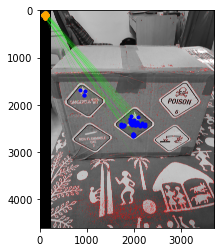

In [ ]:


for i in range(len(AX)):
    plt.plot(AX[i],AY[i], marker='.', color="Orange") # Test set

for i in range(len(BY)):
    plt.plot(BX[i]+wid,BY[i], marker='.', color="Blue") # Test set

plt.imshow(image1)
plt.show()

In [ ]:
New_B = []

for i in range(len(BY)):
    New_B.append(BX[i]+wid)

In [ ]:
print(New_B)

[1731, 1731, 1733, 1747, 1746, 1764, 1778, 1778, 1905, 1905, 1920, 1920, 1926, 1926, 1929, 1942, 864, 1948, 1958, 1955, 1966, 1967, 1968, 1968, 1989, 1981, 930, 930, 1986, 1986, 1990, 2019, 2021, 2021, 2039, 2039, 2050, 964, 2069, 2069, 2087, 2082, 1764, 2097, 2132, 2139, 2139, 2157, 2159, 2217, 2212, 2222, 2224]


In [ ]:
Pair_B = []

Pair_B = list(zip(New_B,BY))

print(Pair_B, len(Pair_B))


[(1731, 2449), (1731, 2410), (1733, 2434), (1747, 2444), (1746, 2419), (1764, 2449), (1778, 2439), (1778, 2439), (1905, 2370), (1905, 2370), (1920, 2300), (1920, 2300), (1926, 2412), (1926, 2412), (1929, 2391), (1942, 2233), (864, 1681), (1948, 2359), (1958, 2351), (1955, 2390), (1966, 2431), (1967, 2650), (1968, 2611), (1968, 2611), (1989, 2325), (1981, 2617), (930, 1783), (930, 1783), (1986, 2652), (1986, 2652), (1990, 2632), (2019, 2391), (2021, 2436), (2021, 2436), (2039, 2406), (2039, 2427), (2050, 2414), (964, 1699), (2069, 2367), (2069, 2367), (2087, 2254), (2082, 2406), (1764, 2449), (2097, 2433), (2132, 2447), (2139, 2435), (2139, 2435), (2157, 2396), (2159, 2411), (2217, 2421), (2212, 2454), (2222, 2445), (2224, 2401)] 53


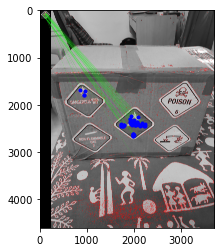

In [ ]:
for i in range(len(BY)):
    plt.plot(New_B[i],BY[i], marker='.', color="Blue") # Test set

plt.imshow(image1)
plt.show()

Density-based Spatial Clustering of Applications with Noise.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
dbscan=DBSCAN(eps=3,min_samples=2)
model=dbscan.fit(Pair_B)
labels=model.labels_
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True
n_clusters=len(set(labels))- (1 if -1 in labels else 0)

db=DBSCAN(eps=3,min_samples=2,metric='euclidean')

In [ ]:
model=db.fit(Pair_B)
label=model.labels_

In [ ]:
from sklearn import metrics
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 11


K - Means 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans = KMeans(n_clusters)
kmeans.fit(Pair_B)
y_kmeans = kmeans.predict(Pair_B)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Pair_B)

In [ ]:
R = []
for i in range(len(Pair_B)):
    R.append(Pair_B[i][0])


C = []
for i in range(len(Pair_B)):
    C.append(Pair_B[i][1])


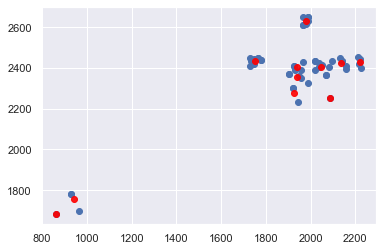

In [ ]:
plt.scatter(R, C)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='RED', alpha=0.9);
plt.show()

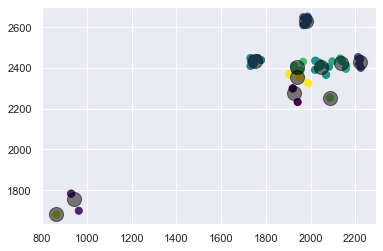

In [ ]:
plt.scatter(R, C, c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
print(centers)

[[1927.33333333 2277.66666667]
 [ 941.33333333 1755.        ]
 [2218.75       2430.25      ]
 [1978.         2632.14285714]
 [1752.44444444 2436.88888889]
 [2045.44444444 2405.55555556]
 [2137.16666667 2426.16666667]
 [1940.4        2407.2       ]
 [2087.         2254.        ]
 [ 864.         1681.        ]
 [1941.         2355.        ]]


In [ ]:
CX = []
CY = []
for i in centers:
   CX.append(i[0])
   CY.append(i[1])

print(CX,CY)


[1927.3333333333333, 941.3333333333334, 2218.75, 1978.0, 1752.4444444444443, 2045.4444444444443, 2137.1666666666665, 1940.4, 2087.0, 864.0, 1941.0] [2277.6666666666665, 1755.0, 2430.25, 2632.1428571428573, 2436.8888888888887, 2405.5555555555557, 2426.1666666666665, 2407.2, 2254.0, 1681.0, 2355.0]


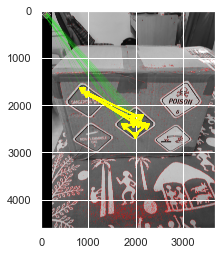

In [ ]:
for i in range(len(centers)):
    plt.plot(CX,CY, marker='v', color="Yellow") # Test set
plt.imshow(image1)
plt.show()

In [ ]:
print(n_clusters)

11


In [ ]:
clf =  KMeans(n_clusters)
clf.fit(Pair_B)

KMeans(n_clusters=11)

In [ ]:
clf.n_clusters

11

In [ ]:
clf.labels_

array([ 2,  2,  2,  2,  2,  2,  2,  2,  6,  6, 10, 10,  6,  6,  6, 10,  1,
        5,  5,  6,  6,  4,  4,  4,  5,  4,  8,  8,  4,  4,  4,  3,  3,  3,
        3,  3,  3,  1,  3,  3,  9,  3,  2,  0,  0,  0,  0,  0,  0,  7,  7,
        7,  7])

Evaluating Clustering Performance

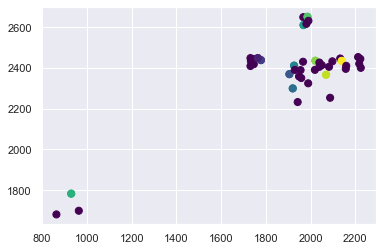

In [ ]:

plt.scatter(R, C, c=labels,
            s=50, cmap='viridis');

In [ ]:

scaled_features = scaler.fit_transform(Pair_B)

In [ ]:
mydict = {i: np.where(clf.labels_ == i)[0] for i in range(clf.n_clusters)}
longest = max(len(item) for item in mydict.values())
result = [item for item in mydict.values() if len(item) == longest]

In [ ]:
key_ind = []
for key, value in mydict.items() :
    if len(value) == longest:
        key_ind.append(key)


final_list = []
for i in range(len(centers)):
    for m in range(len(key_ind)):
        if i == key_ind[m]:
            final_list.append((CX[i],CY[i]))
            

In [ ]:
FX = []
FY = []

for i in final_list:
   FX.append(i[0])
   FY.append(i[1])

print(FX,FY)


[2218.75, 1978.0] [2430.25, 2632.1428571428573]


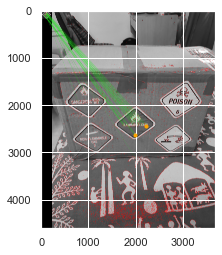

In [ ]:
for i in range(len(FX)):
    plt.plot(FX[i],FY[i], marker='.', color="Orange") # Test set

plt.imshow(image1)
plt.show()